# Python Implementation of Agglomerative Hierarchical Clustering

## Step 1: Import the libraries

In [18]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

## Step 2: Load the dataset

In [45]:
# load the data
df = pd.read_csv('Customers.csv')

In [46]:
X = df.iloc[:,[3,4]].values

## Step 3: Perform hierarchical clustering
We use `scipy.cluster.hierarchy.linkage` function to perform \
hierarchical clustering on the dataset X using the Ward method
(`method='ward'`).

In [110]:
Z = linkage(X, method='ward') # Method can be changed as needed

## Step 4: Plot dendrogram
The `dendrogram()` function provides a flexible way to customize the appearance of the dendrogram,\
 such as changing the color, labels, and layout.

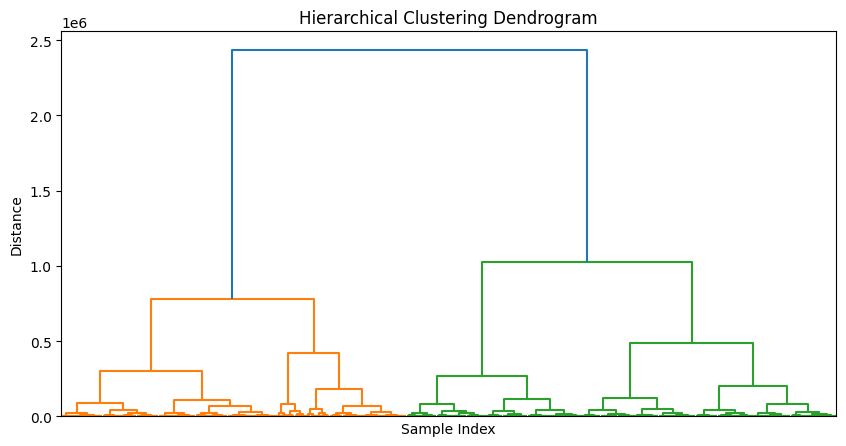

In [111]:
plt.figure(figsize=(10, 5))

# Plot the dendrogram
dend = shc.dendrogram(Z, labels=None)
# Remove x-axis labels
plt.xticks([]) # since it will overlap
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.savefig('image.pdf')
plt.show()

### Using this Dendrogram, we will now determine the optimal number of clusters for our model.
For this, we will find the **maximum vertical distance that does not cut any horizontal bar**.\
Consider the below diagram:

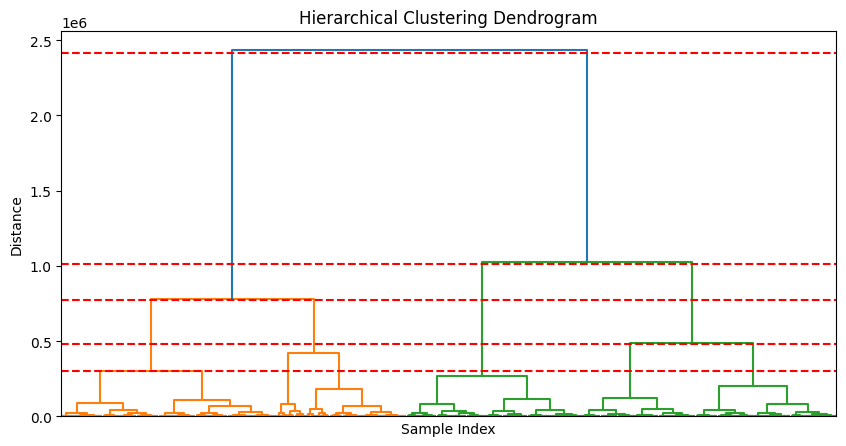

In [125]:
plt.figure(figsize=(10, 5))

# Plot the dendrogram
dend = shc.dendrogram(Z, labels=None)

for i, d in enumerate(sorted(dend['dcoord'])[-5:]):
    plt.axhline(y = .99*d[1], color = 'r', linestyle = '--') 

plt.xticks([]) # since it will overlap
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In the above diagram, we have shown the vertical distances that are not cutting their horizontal bars. As we can visualize, the distance between 3rd and 4th dotted lines is looking the maximum, so according to this, the number of clusters will be 4(the vertical lines in this range). We can also take the 1st and 2nd dotted lines as it is greater than  the distance between 3rd and 4th dotted lines, but we will consider the 4 clusters because the same we calculated in the K-means algorithm.
So, the optimal number of clusters will be 4, and we will train the model in the next step, using the same.

## Step 5: Apply Agglomerative Hierarchical Clustering with Optimal Number of Clusters
### Choosing number of clusters = 4 

In [126]:
agglomerative = AgglomerativeClustering(n_clusters=4, linkage='ward') 
agglomerative.fit(X)

# Get cluster labels
labels = agglomerative.labels_

print(np.unique(labels))

[0 1 2 3]


## Step 6: Visualize the Clusters

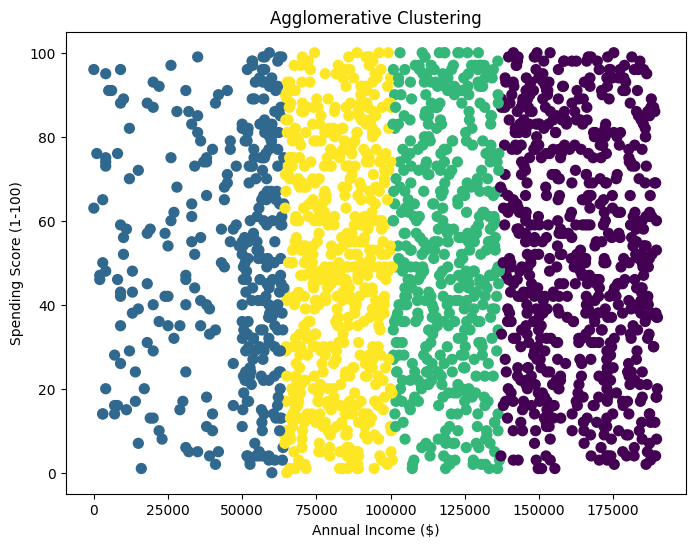

In [127]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title("Agglomerative Clustering")
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.show()